<p><img alt="udeA logo" height="150px" src="https://github.com/freddyduitama/images/blob/master/logo.png?raw=true" align="left" hspace="50px" vspace="0px" style="width:107px;height:152px;"></p>
<h1><font color='0B5345'> <center>  </center></font></h1>
<h2><font color='0B5345'> <center>Proyecto 4: Clasificación de señales ECG </center></font></h2>
<font  face="Courier New" size="3">
<p1><center> Catalina Guerra - Juan Esteban Campillo - Angie Tovar</center></p1>

<p3><center><b><font color='0B5345' face="Lucida Calligraphy,Comic Sans MS,Lucida Console" size="5">Universidad de Antioquia</font></b> </center></p3>

##**Importanción de librerias**

In [39]:
pip install neurokit2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 693.1/693.1 kB 15.1 MB/s eta 0:00:00


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import zipfile
import scipy
from scipy import fft
from scipy.signal import detrend
import neurokit2 as nk
import math

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report,confusion_matrix

##**Carga del archivo**

In [41]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [42]:
!cp /content/drive/MyDrive/ECGDataDenoised.zip .


##**1. Extracción de los registros**

###**1.1 Bradicardia sinusal**

In [43]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
SB = df_pacientes[df_pacientes['Rhythm'] == 'SB']
SB_files = SB['FileName'].tolist()


zip_path = 'ECGDataDenoised.zip'
output_dir = 'ECGDataDenoised/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in SB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files.append(file_name)

bradicardia_sinusal = pd.DataFrame(extracted_files, columns=['ExtractedFiles'])
print(bradicardia_sinusal)


                                      ExtractedFiles
0     ECGDataDenoised/MUSE_20180111_155758_17000.csv
1     ECGDataDenoised/MUSE_20180111_155839_67000.csv
2     ECGDataDenoised/MUSE_20180111_155859_36000.csv
3     ECGDataDenoised/MUSE_20180111_155907_78000.csv
4     ECGDataDenoised/MUSE_20180111_160033_11000.csv
...                                              ...
3884  ECGDataDenoised/MUSE_20180120_123723_19000.csv
3885  ECGDataDenoised/MUSE_20180120_123729_60000.csv
3886  ECGDataDenoised/MUSE_20180120_123811_50000.csv
3887  ECGDataDenoised/MUSE_20180120_123813_67000.csv
3888  ECGDataDenoised/MUSE_20180120_123819_05000.csv

[3889 rows x 1 columns]


###**1.2 Fibrilación auricular**

In [44]:
df_pacientes = pd.read_excel('/content/drive/MyDrive/Diagnostics.xlsx')
AFIB = df_pacientes[df_pacientes['Rhythm'] == 'AFIB']
AFIB_files = AFIB['FileName'].tolist()


zip_path = 'ECGDataDenoised.zip'
output_dir = 'ECGDataDenoised/FilteredFiles'

os.makedirs(output_dir, exist_ok=True)
extracted_files1 = []

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    for file_name in zip_ref.namelist():
        if any(sb_file in file_name for sb_file in AFIB_files):
            zip_ref.extract(file_name, output_dir)
            extracted_files1.append(file_name)

fibrilación_auricular = pd.DataFrame(extracted_files1, columns=['ExtractedFiles'])
print(fibrilación_auricular)

                                      ExtractedFiles
0     ECGDataDenoised/MUSE_20180111_155154_74000.csv
1     ECGDataDenoised/MUSE_20180111_155203_15000.csv
2     ECGDataDenoised/MUSE_20180111_155903_57000.csv
3     ECGDataDenoised/MUSE_20180111_155945_02000.csv
4     ECGDataDenoised/MUSE_20180111_160053_89000.csv
...                                              ...
1775  ECGDataDenoised/MUSE_20180712_161449_58000.csv
1776  ECGDataDenoised/MUSE_20180712_161451_72000.csv
1777  ECGDataDenoised/MUSE_20180712_161452_78000.csv
1778  ECGDataDenoised/MUSE_20180712_161503_00000.csv
1779  ECGDataDenoised/MUSE_20180712_161505_16000.csv

[1780 rows x 1 columns]


In [45]:
!unzip ECGDataDenoised.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: ECGDataDenoised/MUSE_20180116_125802_57000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125812_73000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125822_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125825_58000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125842_09000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125845_27000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125847_39000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125906_02000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125918_29000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125919_34000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125921_43000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125925_64000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125946_45000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_125948_54000.csv  
  inflating: ECGDataDenoised/MUSE_20180116_130000_80000.csv  
  inflati

##**2. Aplicación del tutorial**

###**2.1 Archivos de fibrilación auricular**

In [46]:
datosf_1 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180111_160053_89000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosf_1.head()
señal_fibrilacion1 = datosf_1['II'].values

datosf_2 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180111_155154_74000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosf_2.head()
señal_fibrilacion2 = datosf_2['II'].values

datosf_3 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180712_161449_58000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosf_3.head()
señal_fibrilacion3 = datosf_3['II'].values

###**2.2 Archivo de bradicardia sinusal**

In [47]:
# Archivo de bradicardia sinusal
datosb_1 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180111_155859_36000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosb_1.head()
señal_bradicardia1= datosb_1['II'].values

datosb_2 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180120_123813_67000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosb_2.head()
señal_bradicardia2= datosb_2['II'].values

datosb_3 = pd.read_csv('/content/ECGDataDenoised/MUSE_20180111_160033_11000.csv' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
datosb_3.head()
señal_bradicardia3= datosb_3['II'].values

###**2.3 Uso de la funcio ecg_peaks() y ecg_delineate() para las dos patologias**

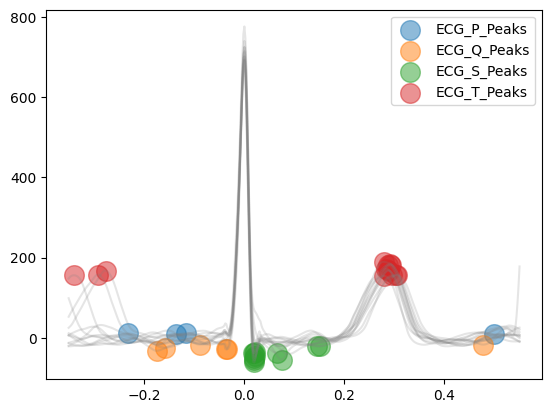

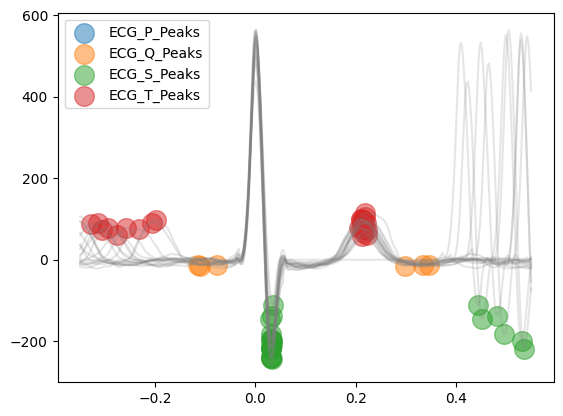

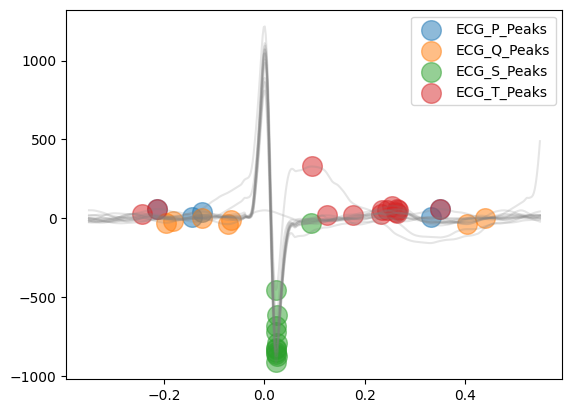

In [48]:
_, rpeaks1 = nk.ecg_peaks(señal_fibrilacion1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion1, rpeaks1, sampling_rate=500, method="peak",show=True,show_type='peaks')

_, rpeaks2 = nk.ecg_peaks(señal_fibrilacion2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion2, rpeaks2, sampling_rate=500, method="peak",show=True,show_type='peaks')

_, rpeaks3 = nk.ecg_peaks(señal_fibrilacion3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion3, rpeaks3, sampling_rate=500, method="peak",show=True,show_type='peaks')


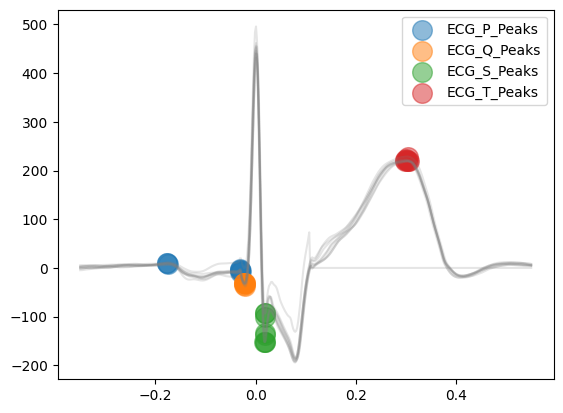

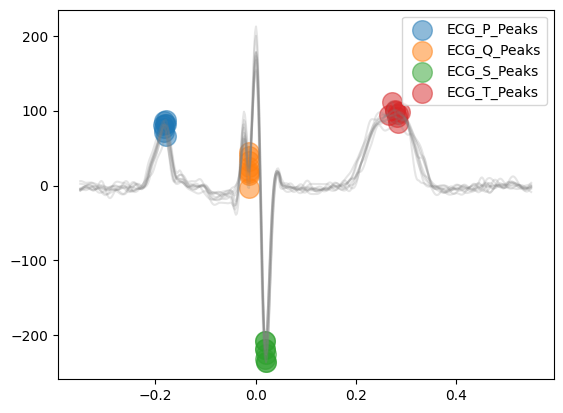

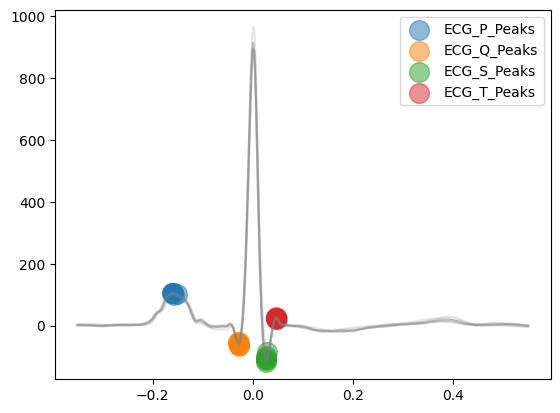

In [49]:
_, rpeaks1 = nk.ecg_peaks(señal_bradicardia1, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia1, rpeaks1, sampling_rate=500, method="peak",show=True,show_type='peaks')

_, rpeaks2 = nk.ecg_peaks(señal_bradicardia2, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia2, rpeaks2, sampling_rate=500, method="peak",show=True,show_type='peaks')

_, rpeaks3 = nk.ecg_peaks(señal_bradicardia3, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia3, rpeaks3, sampling_rate=500, method="peak",show=True,show_type='peaks')

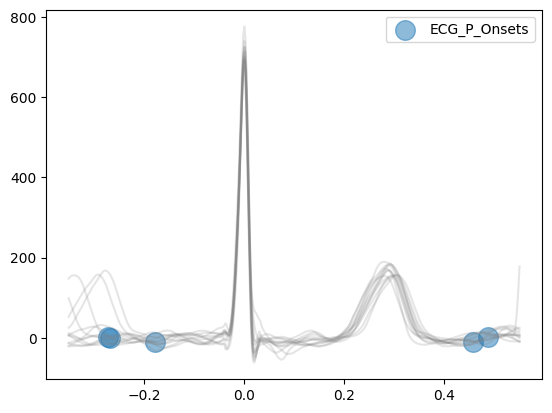

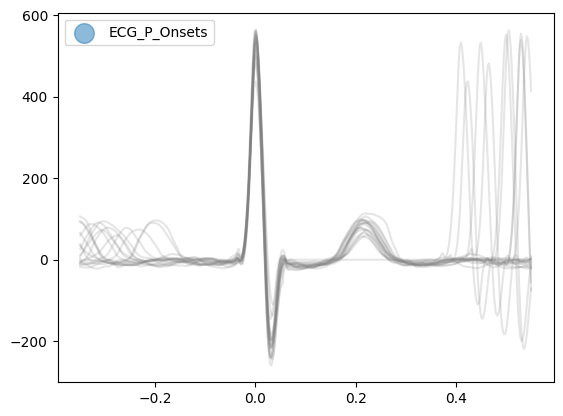

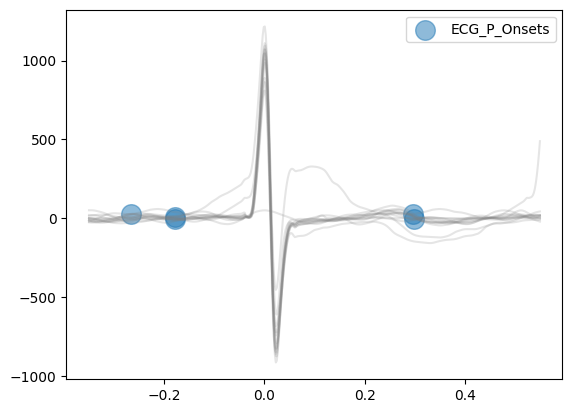

In [50]:
_, rpeaks1 = nk.ecg_peaks(señal_fibrilacion1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion1, rpeaks1, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

_, rpeaks2 = nk.ecg_peaks(señal_fibrilacion2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion2, rpeaks2, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

_, rpeaks3 = nk.ecg_peaks(señal_fibrilacion3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion3, rpeaks3, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

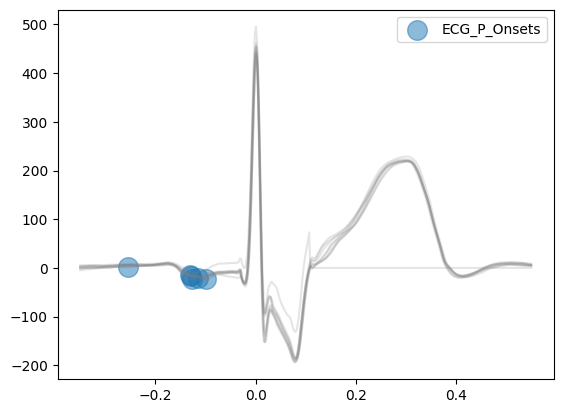

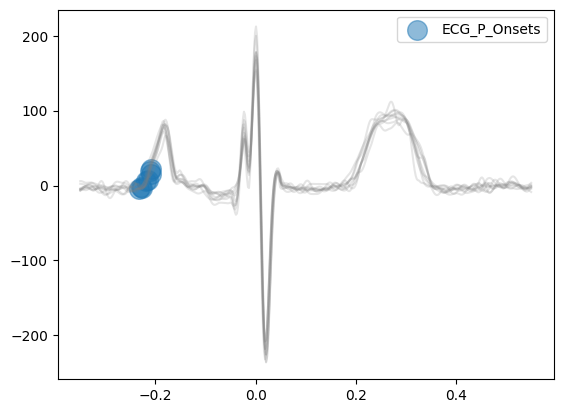

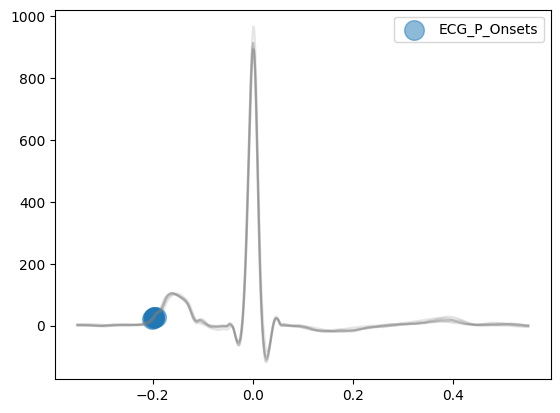

In [51]:
_, rpeaks1 = nk.ecg_peaks(señal_bradicardia1, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia1, rpeaks1, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

_, rpeaks2 = nk.ecg_peaks(señal_bradicardia2, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia2, rpeaks2, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

_, rpeaks3 = nk.ecg_peaks(señal_bradicardia3, sampling_rate=500)
signals, waves2 = nk.ecg_delineate(señal_bradicardia3, rpeaks3, sampling_rate=500, method="peak",show=True,show_type='bounds_P')

In [52]:
pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.9 MB/s eta 0:00:00


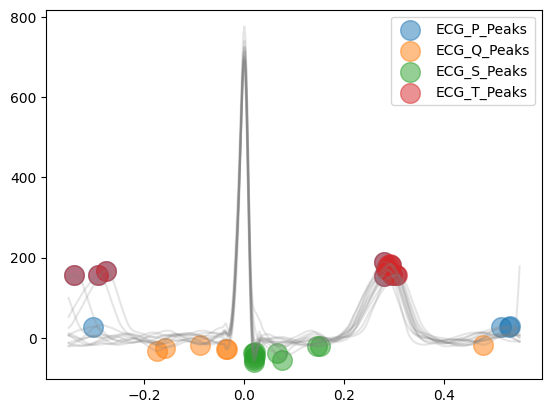

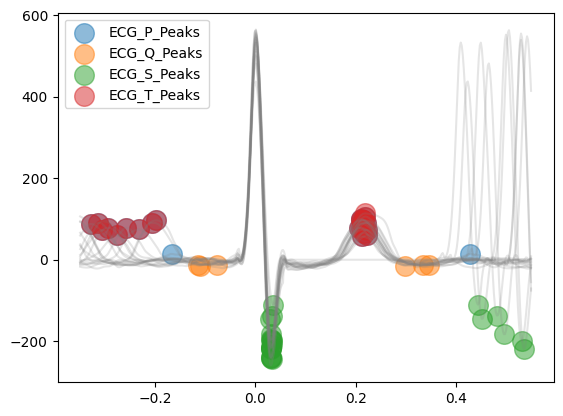

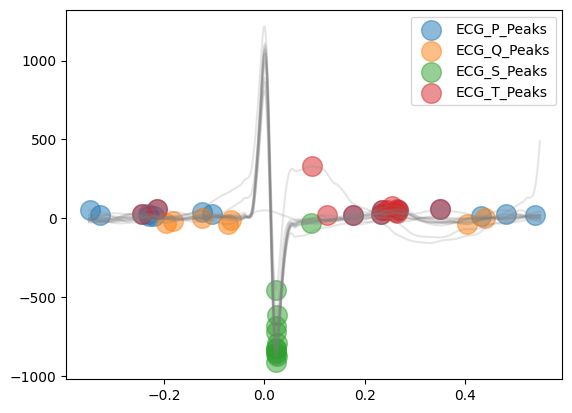

In [53]:
_, rpeaks1 = nk.ecg_peaks(señal_fibrilacion1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion1, rpeaks1, sampling_rate=500, method="cwt",show=True,show_type='peaks')

_, rpeaks2 = nk.ecg_peaks(señal_fibrilacion2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion2, rpeaks2, sampling_rate=500, method="cwt",show=True,show_type='peaks')

_, rpeaks3 = nk.ecg_peaks(señal_fibrilacion3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion3, rpeaks3, sampling_rate=500, method="cwt",show=True,show_type='peaks')

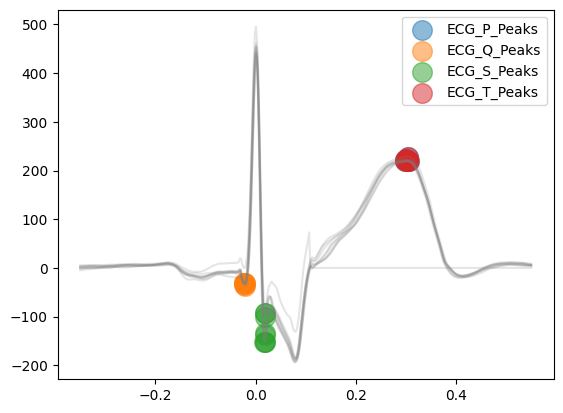

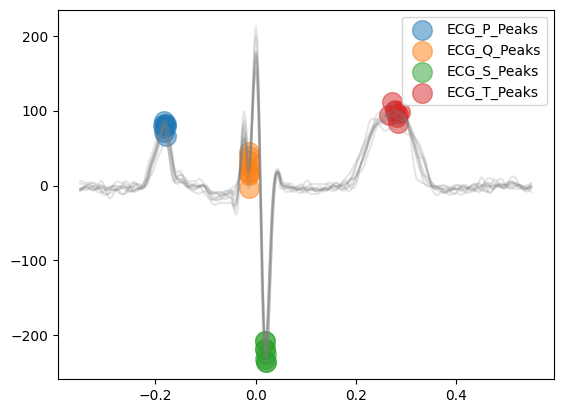

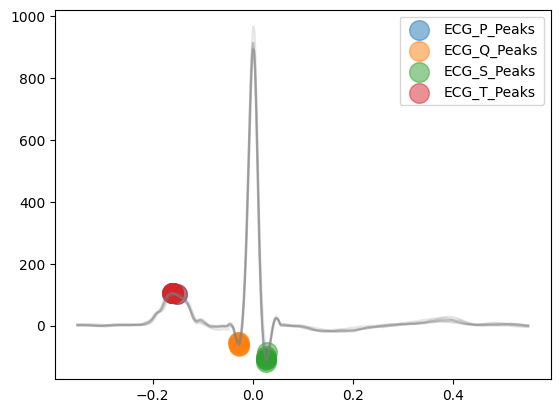

In [54]:
_, rpeaks1 = nk.ecg_peaks(señal_bradicardia1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia1, rpeaks1, sampling_rate=500, method="cwt",show=True,show_type='peaks')

_, rpeaks2 = nk.ecg_peaks(señal_bradicardia2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia2, rpeaks2, sampling_rate=500, method="cwt",show=True,show_type='peaks')

_, rpeaks3 = nk.ecg_peaks(señal_bradicardia3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia3, rpeaks3, sampling_rate=500, method="cwt",show=True,show_type='peaks')

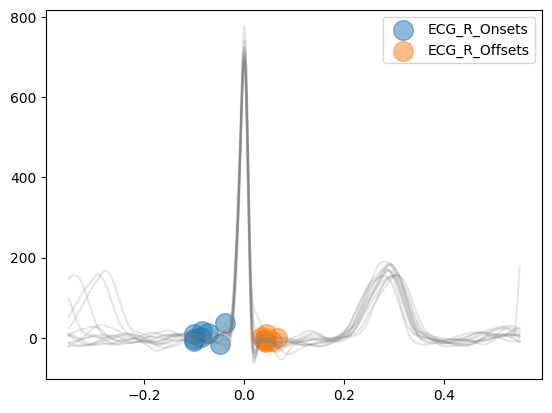

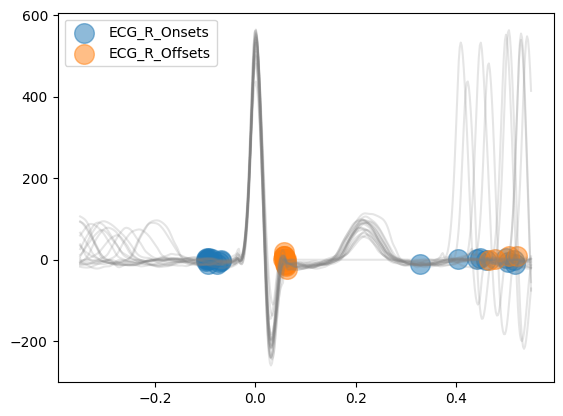

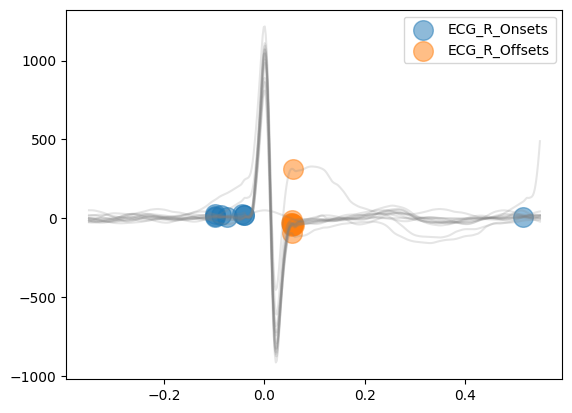

In [55]:
_, rpeaks1 = nk.ecg_peaks(señal_fibrilacion1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion1, rpeaks1, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

_, rpeaks2 = nk.ecg_peaks(señal_fibrilacion2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion2, rpeaks2, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

_, rpeaks3 = nk.ecg_peaks(señal_fibrilacion3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_fibrilacion3, rpeaks3, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

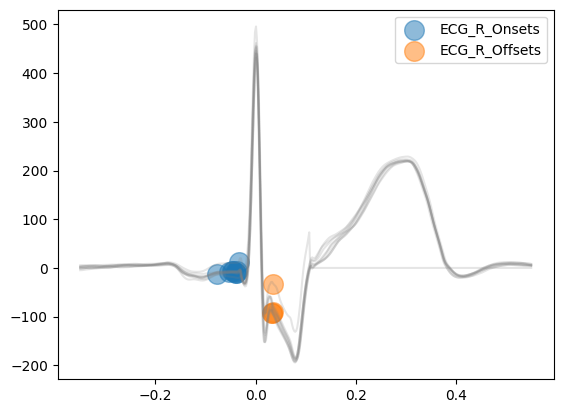

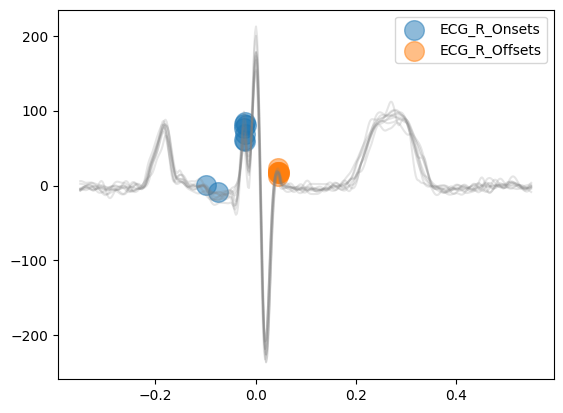

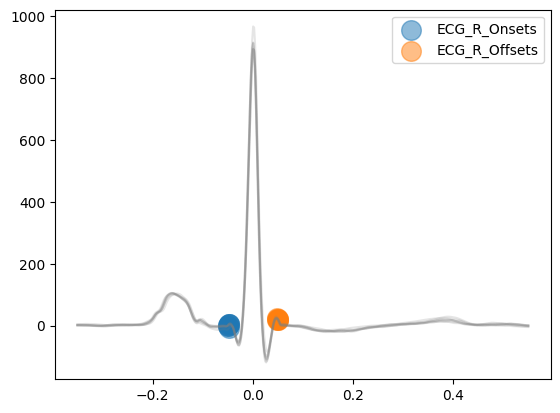

In [56]:
_, rpeaks1 = nk.ecg_peaks(señal_bradicardia1, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia1, rpeaks1, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

_, rpeaks2 = nk.ecg_peaks(señal_bradicardia2, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia2, rpeaks2, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

_, rpeaks3 = nk.ecg_peaks(señal_bradicardia3, sampling_rate=500)
signals, waves1 = nk.ecg_delineate(señal_bradicardia3, rpeaks3, sampling_rate=500, method="cwt",show=True,show_type='bounds_R')

##**3. Lectura de los datos correspondientes a fibrilación auricular y bradicardia sinusal**

In [57]:
def extraccion_datos(señal):
  datos_1 = pd.read_csv(f'/content/ECGDataDenoised/{señal}' , delimiter=',', names=['I', 'II', 'III', 'aVR', 'aVL', 'aVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])
  señal_paciente = datos_1['II'].values
  return señal_paciente

In [58]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files1]
resultado1 = [element.split('ECGDataDenoised/')[1] for element in extracted_files]

In [59]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files]
bradicardia = []
for señal in resultado:
  bradicardia.append(extraccion_datos(señal))


In [60]:
resultado = [element.split('ECGDataDenoised/')[1] for element in extracted_files1]
fibrilacion = []
for señal in resultado:
  fibrilacion.append(extraccion_datos(señal))
  np.array(fibrilacion)

###**3.1 Parametros de fibrilación auricular**

1. Promedio de los intervalos RR
2. Varianza de los intervalos RR
3. Número de intervalos RR
4. Frecuencia Cardiaca ventricular

In [61]:
mean_rr_fibrilacion= []
variance_rr_fibrilacion= []
interval_rr_fibrilacion= []
vrate_fibrilacion= []

for i in range(len(fibrilacion)):
  _, rpeaks = nk.ecg_peaks(fibrilacion[i], sampling_rate=500)
  r_peaks_indices = np.where(_ == 1)[0]
  rr_intervals = np.diff(r_peaks_indices)/500  # Intervalos RR

  # Promedio de los intervalos RR
  mean_rr_f = np.mean(rr_intervals)
  mean_rr_fibrilacion.append(mean_rr_f)

  # Varianza de los intervalos RR
  variance_rr_f = np.var(rr_intervals)
  variance_rr_fibrilacion.append(variance_rr_f)

  # Número de intervalos RR
  rr_count = len(rr_intervals)
  interval_rr_fibrilacion.append(rr_count)

  #Frecuencia cardiaca ventricular
  ventricular_rate_bpm = 60 / np.mean(rr_intervals)
  vrate_fibrilacion.append(ventricular_rate_bpm)



/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis,

5. Frecuencia cardiaca auricular
6. Duración de la onda P

In [62]:
duracion_P_fibrilacion= []
arate_fibrilacion = []

for i in range(len(fibrilacion)):
  _, rpeaks = nk.ecg_peaks(fibrilacion[i], sampling_rate=500)
  #print(f'señal:{i}')
  try:
    signals, waves1 = nk.ecg_delineate(fibrilacion[i], rpeaks, sampling_rate=500, method="cwt")
  except ValueError:  # Si hay un error con la media
    print(f"Error calculando la media para la señal {i+1}.")
  p_peaks_indices = np.where(signals['ECG_P_Peaks'] == 1)[0]
  pp_intervals = np.diff(p_peaks_indices)/500
  atrial_rate_bpm = 60 / np.mean(pp_intervals)
  arate_fibrilacion.append(atrial_rate_bpm)


  onset_cleaned = [x for x in waves1['ECG_P_Onsets'] if not math.isnan(x)]
  offset_cleaned = [x for x in waves1['ECG_P_Offsets'] if not math.isnan(x)]
  onset= np.mean(onset_cleaned)
  offset = np.mean(offset_cleaned)
  duracionP_fibrilacion = offset - onset
  duracion_P_fibrilacion.append(duracionP_fibrilacion)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/di

Error calculando la media para la señal 779.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/di

Error calculando la media para la señal 1142.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Error calculando la media para la señal 1220.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/di

7. Frecuencia de máxima potencia, proyecto 2

In [63]:
fmp_fibrilacion = np.loadtxt('t.txt')

###**3.1 Parametros de Bradicardia sinusal**

1. Promedio de los intervalos RR
2. Varianza de los intervalos RR
3. Número de intervalos RR
4. Frecuencia Cardiaca ventricular

In [64]:
mean_rr_bradicardia= []
variance_rr_bradicardia= []
interval_rr_bradicardia= []
vrate_bradicardia = []

for i in range(len(bradicardia)):
  _, rpeaks = nk.ecg_peaks(bradicardia[i], sampling_rate=500)
  r_peaks_indices = np.where(_ == 1)[0]
  rr_intervals = np.diff(r_peaks_indices)/500  # Intervalos RR

  # Promedio de los intervalos RR
  mean_rr_b = np.mean(rr_intervals)
  mean_rr_bradicardia.append(mean_rr_b)

  # Varianza de los intervalos RR
  variance_rr_b = np.var(rr_intervals)
  variance_rr_bradicardia.append(variance_rr_b)

  # Número de intervalos RR
  rr_count = len(rr_intervals)
  interval_rr_bradicardia.append(rr_count)

  #Frecuencia cardiaca ventricular
  ventricular_rate_bpm = 60 / np.mean(rr_intervals)
  vrate_bradicardia.append(ventricular_rate_bpm)

5. Frecuencia cardiaca auricular
6. Duración de la onda P

In [65]:
duracion_P_bradicardia= []
arate_bradicardia = []

for i in range(len(bradicardia)):
  _, rpeaks = nk.ecg_peaks(bradicardia[i], sampling_rate=500)
  #print(f'señal:{i}')
  try:
    signals, waves1 = nk.ecg_delineate(bradicardia[i], rpeaks, sampling_rate=500, method="cwt")
  except ValueError:  # Si hay un error con la media
    print(f"Error calculando la media para la señal {i+1}.")
  p_peaks_indices = np.where(signals['ECG_P_Peaks'] == 1)[0]
  pp_intervals = np.diff(p_peaks_indices)/500
  atrial_rate_bpm = 60 / np.mean(pp_intervals)
  arate_bradicardia.append(atrial_rate_bpm)


  onset_cleaned = [x for x in waves1['ECG_P_Onsets'] if not math.isnan(x)]
  offset_cleaned = [x for x in waves1['ECG_P_Offsets'] if not math.isnan(x)]
  onset= np.mean(onset_cleaned)
  offset = np.mean(offset_cleaned)
  duracionP_bradicardia =  (offset - onset)/500
  duracion_P_bradicardia.append(duracionP_bradicardia)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/neurokit2/signal/signal_period.py:84: NeuroKitWarning: Too few peaks detected to compute the rate. Returning empty vector.
  warn(


Error calculando la media para la señal 328.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/di

Error calculando la media para la señal 888.


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/di

7. Frecuencia de máxima potencia, proyecto 2

In [66]:
fmp_bradicardia = np.loadtxt('t1.txt')

##**4. Creación del DataFrame**

In [67]:
array_bradicardia = np.full(1780, 'Bradicardia sinusal')
df1 = pd.DataFrame({
    'Registro': np.array(resultado1[:1780]),
    'Estado': array_bradicardia,
    'Mean of RR intervals (s)': mean_rr_bradicardia[:1780],
    'Variance of RR intervals': variance_rr_bradicardia[:1780],
    'RR interval count': interval_rr_bradicardia[:1780],
    'Ventricular rate (bpm)': vrate_bradicardia[:1780],
    'P duration': duracion_P_bradicardia[:1780],
    'Atrial rate (bpm)': arate_bradicardia[:1780],
    'Max power frequency': fmp_bradicardia[:1780]
})

pd.set_option('display.float_format', '{:.6f}'.format)

# Ajustes de visualización
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)  # Ajustar el ancho de la tabla



In [68]:
array_fibrilacion = np.full(1780, 'fibrilacion auricular')
df = pd.DataFrame({
    'Registro': np.array(resultado),
    'Estado': array_fibrilacion,
    'Mean of RR intervals (s)': mean_rr_fibrilacion,
    'Variance of RR intervals': variance_rr_fibrilacion,
    'RR interval count': interval_rr_fibrilacion,
    'Ventricular rate (bpm)': vrate_fibrilacion,
    'P duration': duracion_P_fibrilacion,
    'Atrial rate (bpm)': arate_fibrilacion,
    'Max power frequency': fmp_fibrilacion
})

pd.set_option('display.float_format', '{:.6f}'.format)

# Ajustes de visualización
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.width', 1000)  # Ajustar el ancho de la tabla

print(df1)

                            Registro               Estado  Mean of RR intervals (s)  Variance of RR intervals  RR interval count  Ventricular rate (bpm)  P duration  Atrial rate (bpm)  Max power frequency
0     MUSE_20180111_155758_17000.csv  Bradicardia sinusal                  1.083750                  0.000566                  8               55.363322    0.130500          60.816681             3.700000
1     MUSE_20180111_155839_67000.csv  Bradicardia sinusal                  1.036000                  0.000245                  9               57.915058    0.121556          57.901086             2.900000
2     MUSE_20180111_155859_36000.csv  Bradicardia sinusal                  1.079000                  0.000301                  8               55.607044    0.277800          55.732484             2.800000
3     MUSE_20180111_155907_78000.csv  Bradicardia sinusal                  1.071750                  0.000240                  8               55.983205    0.104500          55.940

In [69]:
df_concatenado = pd.concat([df1, df], ignore_index=True)
df_concatenado

,Registro,Estado,Mean of RR intervals (s),Variance of RR intervals,RR interval count,Ventricular rate (bpm),P duration,Atrial rate (bpm),Max power frequency
0,MUSE_20180111_155758_17000.csv,Bradicardia sinusal,1.083750,0.000566,8,55.363322,0.130500,60.816681,3.700000
1,MUSE_20180111_155839_67000.csv,Bradicardia sinusal,1.036000,0.000245,9,57.915058,0.121556,57.901086,2.900000
2,MUSE_20180111_155859_36000.csv,Bradicardia sinusal,1.079000,0.000301,8,55.607044,0.277800,55.732484,2.800000
3,MUSE_20180111_155907_78000.csv,Bradicardia sinusal,1.071750,0.000240,8,55.983205,0.104500,55.940330,2.800000
4,MUSE_20180111_160033_11000.csv,Bradicardia sinusal,1.260333,0.000145,6,47.606453,0.111000,47.498417,0.800000
...,...,...,...,...,...,...,...,...,...
3555,MUSE_20180712_161449_58000.csv,fibrilacion auricular,0.787167,0.040652,12,76.222740,5.689394,74.290860,12.400000
3556,MUSE_20180712_161451_72000.csv,fibrilacion auricular,0.666000,0.023592,14,90.090090,469.181818,75.273723,3.900000
3557,MUSE_20180712_161452_78000.csv,fibrilacion auricular,0.990667,0.063364,9,60.565276,71.666667,59.612519,3.200000
3558,MUSE_20180712_161503_00000.csv,fibrilacion auricular,0.777091,0.017623,11,77.211044,62.181818,76.316459,4.100000


In [70]:
df_NN = pd.read_csv('dataframe_a_trabajar.csv')
df_NN

,Registro,Estado,Mean of RR intervals (s),Variance of RR intervals,RR interval count,Ventricular rate (bpm),P duration,Atrial rate (bpm),Max power frequency
0,MUSE_20180111_155758_17000.csv,Bradicardia sinusal,1.083750,0.000566,8,55.363322,0.130500,60.816681,3.700000
1,MUSE_20180111_155839_67000.csv,Bradicardia sinusal,1.036000,0.000245,9,57.915058,0.121556,57.901086,2.900000
2,MUSE_20180111_155859_36000.csv,Bradicardia sinusal,1.079000,0.000301,8,55.607044,0.277800,55.732484,2.800000
3,MUSE_20180111_155907_78000.csv,Bradicardia sinusal,1.071750,0.000240,8,55.983205,0.104500,55.940330,2.800000
4,MUSE_20180111_160033_11000.csv,Bradicardia sinusal,1.260333,0.000145,6,47.606453,0.111000,47.498417,0.800000
...,...,...,...,...,...,...,...,...,...
3555,MUSE_20180712_161449_58000.csv,fibrilacion auricular,0.787167,0.040652,12,76.222740,5.689394,74.290860,12.400000
3556,MUSE_20180712_161451_72000.csv,fibrilacion auricular,0.666000,0.023592,14,90.090090,469.181818,75.273723,3.900000
3557,MUSE_20180712_161452_78000.csv,fibrilacion auricular,0.990667,0.063364,9,60.565276,71.666667,59.612519,3.200000
3558,MUSE_20180712_161503_00000.csv,fibrilacion auricular,0.777091,0.017623,11,77.211044,62.181818,76.316459,4.100000


# **Preprocesamiento:**

### 1. Convertir salida en datos binarios (0 o 1)

In [71]:
df_NN['Estado'] = df_NN['Estado'].map({'fibrilacion auricular': 0,'Bradicardia sinusal': 1})
df_NN

,Registro,Estado,Mean of RR intervals (s),Variance of RR intervals,RR interval count,Ventricular rate (bpm),P duration,Atrial rate (bpm),Max power frequency
0,MUSE_20180111_155758_17000.csv,1,1.083750,0.000566,8,55.363322,0.130500,60.816681,3.700000
1,MUSE_20180111_155839_67000.csv,1,1.036000,0.000245,9,57.915058,0.121556,57.901086,2.900000
2,MUSE_20180111_155859_36000.csv,1,1.079000,0.000301,8,55.607044,0.277800,55.732484,2.800000
3,MUSE_20180111_155907_78000.csv,1,1.071750,0.000240,8,55.983205,0.104500,55.940330,2.800000
4,MUSE_20180111_160033_11000.csv,1,1.260333,0.000145,6,47.606453,0.111000,47.498417,0.800000
...,...,...,...,...,...,...,...,...,...
3555,MUSE_20180712_161449_58000.csv,0,0.787167,0.040652,12,76.222740,5.689394,74.290860,12.400000
3556,MUSE_20180712_161451_72000.csv,0,0.666000,0.023592,14,90.090090,469.181818,75.273723,3.900000
3557,MUSE_20180712_161452_78000.csv,0,0.990667,0.063364,9,60.565276,71.666667,59.612519,3.200000
3558,MUSE_20180712_161503_00000.csv,0,0.777091,0.017623,11,77.211044,62.181818,76.316459,4.100000


Dividir variables usadas para predecir y variables categóricas


In [72]:
target_column = ['Estado']
predictors = list(set(list(df_NN.columns))-set(target_column)-set(['Registro']))
print(predictors)

['Atrial rate (bpm)', 'RR interval count', 'Ventricular rate (bpm)', 'Mean of RR intervals (s)', 'P duration', 'Max power frequency', 'Variance of RR intervals']


### 2. Eliminar NaN

In [73]:
df_NN[predictors] = df_NN[predictors].fillna(df_NN[predictors].mean())

### 3. Normalizar los datos

In [74]:
df_NN[predictors] = df_NN[predictors]/df_NN[predictors].max()
df_NN.describe()

,Estado,Mean of RR intervals (s),Variance of RR intervals,RR interval count,Ventricular rate (bpm),P duration,Atrial rate (bpm),Max power frequency
count,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000,3560.000000
mean,0.500000,0.311389,0.006594,0.426372,0.447172,0.017661,0.388120,0.068783
std,0.500070,0.088618,0.020450,0.161729,0.155718,0.057290,0.130676,0.057716
min,0.000000,0.126119,0.000001,0.000000,0.126119,-0.501784,0.042353,0.002000
25%,0.000000,0.232089,0.000246,0.307692,0.332941,0.000060,0.321730,0.034000
50%,0.500000,0.352229,0.002554,0.346154,0.358060,0.000079,0.348035,0.058000
75%,1.000000,0.378803,0.007793,0.538462,0.543408,0.033458,0.434464,0.080000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 4. Mezclar aleatoriamente

In [75]:
from sklearn.utils import shuffle
df_NN = shuffle(df_NN, random_state=42)

# **Crear conjunto de Entrenamiento y de Prueba**

In [76]:
#%% Step 4 - Creating the Training and Test Datasets
X = df_NN[predictors].values
y = df_NN[target_column].values

#the same seed is used to partition to obtain the same results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
y_test = np.squeeze(y_test)
y_train = np.squeeze(y_train)
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(2492, 7)
(2492,)
(1068, 7)
(1068,)


# Crear red neuronal

In [77]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000)
print(mlp)

MLPClassifier(hidden_layer_sizes=(8, 8, 8), max_iter=1000)


# Entrenar

In [78]:
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

In [79]:
from itertools import product
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [80]:
print(confusion_matrix(y_train,predict_train))

[[1249    5]
 [   2 1236]]


Confusion matrix, without normalization
[[1249    5]
 [   2 1236]]


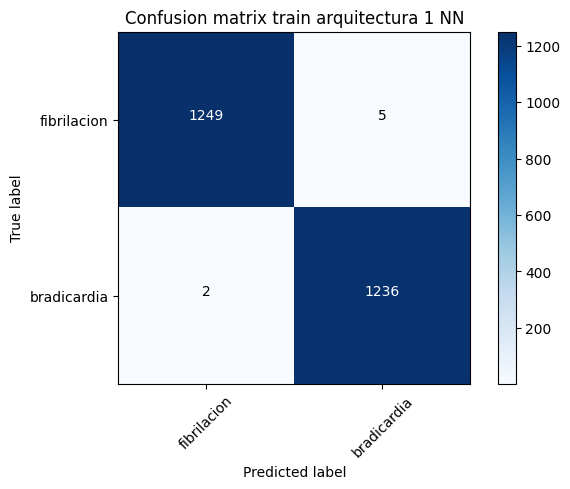

In [81]:
plot_confusion_matrix(confusion_matrix(y_train,predict_train), classes=target_names,
                      title='Confusion matrix train arquitectura 1 NN')

In [82]:
target_names = ['fibrilacion', 'bradicardia']
print(classification_report(y_train,predict_train,target_names=target_names))

              precision    recall  f1-score   support

 fibrilacion       1.00      1.00      1.00      1254
 bradicardia       1.00      1.00      1.00      1238

    accuracy                           1.00      2492
   macro avg       1.00      1.00      1.00      2492
weighted avg       1.00      1.00      1.00      2492



Test

In [83]:
print(confusion_matrix(y_test,predict_test))

[[525   1]
 [ 13 529]]


Confusion matrix, without normalization
[[525   1]
 [ 13 529]]


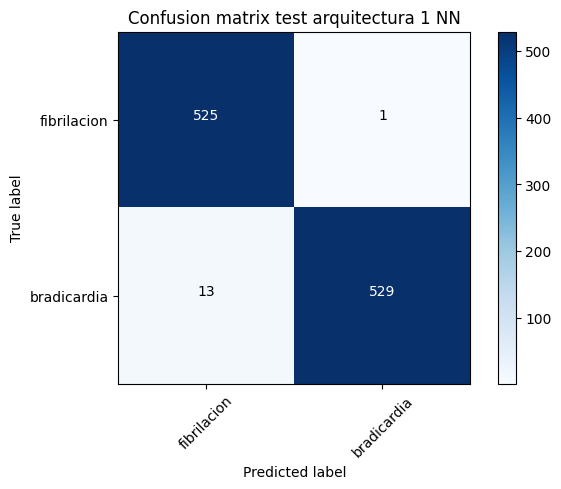

In [84]:
plot_confusion_matrix(confusion_matrix(y_test,predict_test), classes=target_names,
                      title='Confusion matrix test arquitectura 1 NN')

In [85]:
print(classification_report(y_test,predict_test,target_names=target_names))

              precision    recall  f1-score   support

 fibrilacion       0.98      1.00      0.99       526
 bradicardia       1.00      0.98      0.99       542

    accuracy                           0.99      1068
   macro avg       0.99      0.99      0.99      1068
weighted avg       0.99      0.99      0.99      1068



Arquitectura 2

In [86]:
mlp2 = MLPClassifier(hidden_layer_sizes=(32,16,8,4), activation='tanh', solver='sgd', max_iter=2000)

In [87]:
mlp2.fit(X_train,y_train)

predict_train2 = mlp2.predict(X_train)
predict_test2 = mlp2.predict(X_test)

In [88]:
print(confusion_matrix(y_train,predict_train2))

[[1173   81]
 [  36 1202]]


Confusion matrix, without normalization
[[1173   81]
 [  36 1202]]


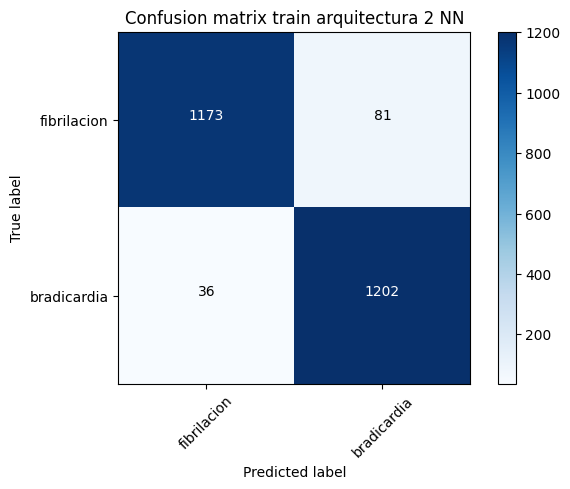

In [89]:
plot_confusion_matrix(confusion_matrix(y_train,predict_train2), classes=target_names,
                      title='Confusion matrix train arquitectura 2 NN')

In [90]:
print(confusion_matrix(y_test,predict_test2))

[[487  39]
 [ 26 516]]


Confusion matrix, without normalization
[[487  39]
 [ 26 516]]


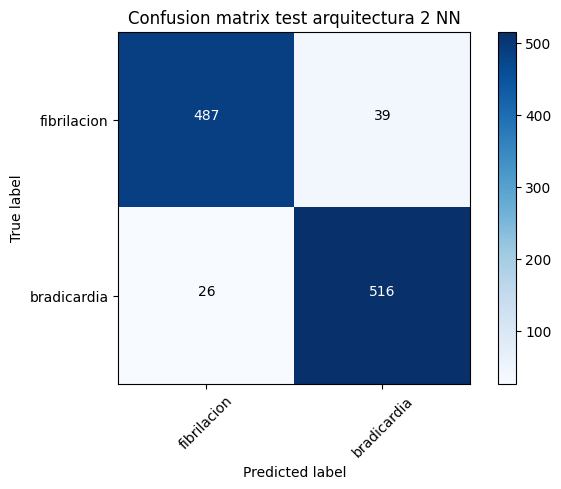

In [91]:
plot_confusion_matrix(confusion_matrix(y_test,predict_test2), classes=target_names,
                      title='Confusion matrix test arquitectura 2 NN')

Arquitectura 3

In [92]:
mlp3 = MLPClassifier(hidden_layer_sizes=(4,4), activation='logistic', solver='adam', max_iter=1000)

In [93]:
mlp3.fit(X_train,y_train)

predict_train3 = mlp3.predict(X_train)
predict_test3 = mlp3.predict(X_test)

In [94]:
print(confusion_matrix(y_train,predict_train3))

[[1168   86]
 [  35 1203]]


Confusion matrix, without normalization
[[1168   86]
 [  35 1203]]


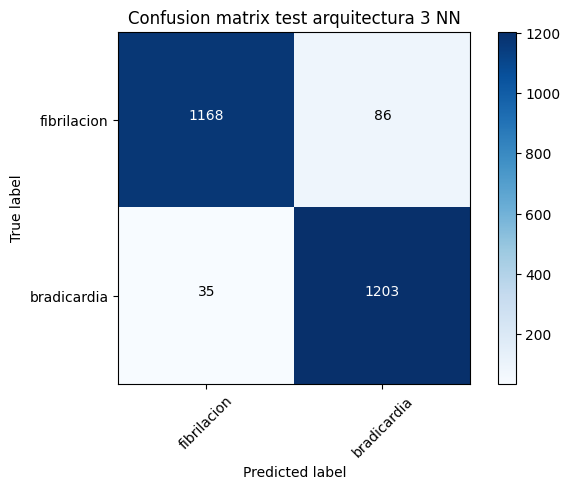

In [95]:
plot_confusion_matrix(confusion_matrix(y_train,predict_train3), classes=target_names,
                      title='Confusion matrix test arquitectura 3 NN')

In [96]:
    print(confusion_matrix(y_test,predict_test3))

[[484  42]
 [ 24 518]]


Confusion matrix, without normalization
[[484  42]
 [ 24 518]]


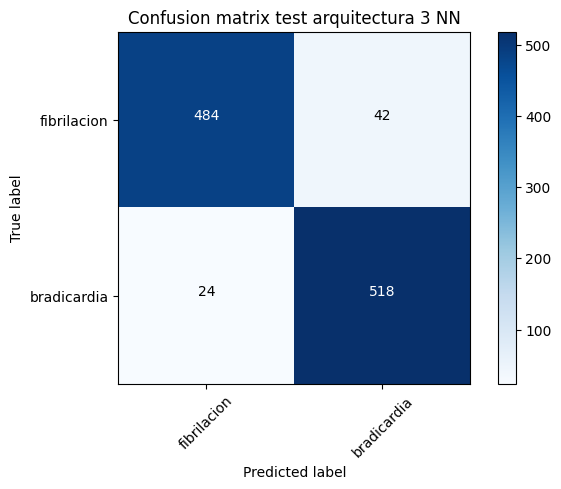

In [97]:
plot_confusion_matrix(confusion_matrix(y_test,predict_test3), classes=target_names,
                      title='Confusion matrix test arquitectura 3 NN')

# K-Means

In [98]:
from sklearn.cluster import KMeans

In [99]:
k_means = KMeans(n_clusters=2, random_state=42)

In [100]:
k_means.fit(X_train)
test_labels = k_means.predict(X_test)

print(test_labels)

[0 0 1 ... 0 0 0]


In [101]:
print(confusion_matrix(y_test,test_labels))

[[199 327]
 [537   5]]


Confusion matrix, without normalization
[[199 327]
 [537   5]]


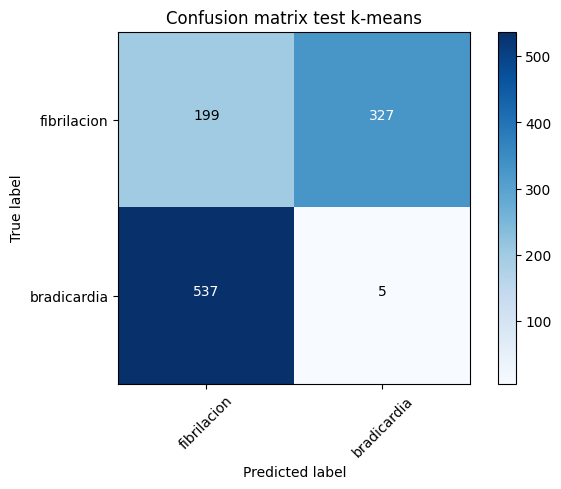

In [102]:
plot_confusion_matrix(confusion_matrix(y_test,test_labels), classes=target_names,
                      title='Confusion matrix test k-means')

## SVM

In [103]:
from sklearn import svm

In [104]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

SVC()

In [105]:
yhat = clf.predict(X_test)

In [106]:
print(confusion_matrix(y_test,yhat))

[[491  35]
 [ 24 518]]


Confusion matrix, without normalization
[[491  35]
 [ 24 518]]


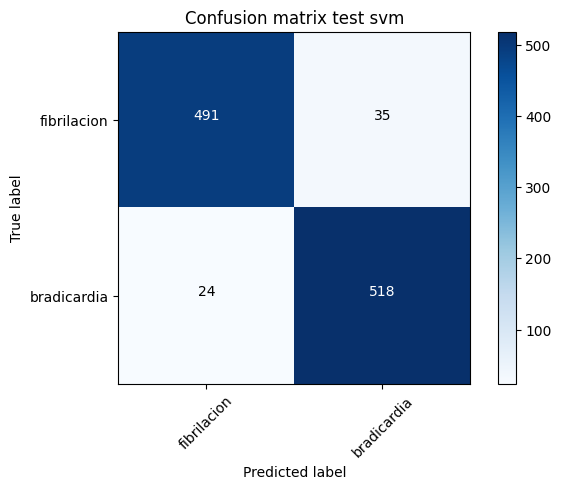

In [107]:
plot_confusion_matrix(confusion_matrix(y_test,yhat), classes=target_names,
                      title='Confusion matrix test svm')